In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
dlc1 = pd.read_csv("dlc_1.csv", header = 2)
dlc2 = pd.read_csv("dlc_2.csv")

In [3]:
dlc1.head()

,coords,x,y,likelihood,x.1,y.1,likelihood.1,x.2,y.2,likelihood.2,x.3,y.3,likelihood.3
0,0,353.241520,142.206495,0.997991,265.791942,121.372621,0.989763,161.457024,101.319112,0.994249,157.156738,101.542242,0.023571
1,1,353.630806,141.739653,0.998005,265.684674,121.670990,0.989445,161.749703,100.933177,0.992628,266.356235,115.078214,0.019632
2,2,353.718143,141.815697,0.998014,266.000032,121.289844,0.989177,161.603716,100.951037,0.993898,157.669603,101.599254,0.020450
3,3,353.168735,142.243849,0.998063,265.555681,121.438983,0.989576,160.807938,100.488452,0.987789,266.164672,114.668387,0.021176
4,4,353.499415,142.055423,0.998036,266.277968,121.584449,0.989366,158.988544,99.847046,0.982885,156.826299,100.080634,0.021901


In [4]:
dlc1.rename(columns={"x":"base_x", "y":"base_y", 
                     "x.1":"middle_x", "y.1":"middle_y", 
                     "x.2":"tip_x", "y.2":"tip_y", 
                     "x.3":"obj_x", "y.3":"obj_y"}, inplace=True)

In [5]:
dlc1.drop(["likelihood","likelihood.1","likelihood.2","likelihood.3","obj_x", "obj_y"], axis=1, inplace=True)

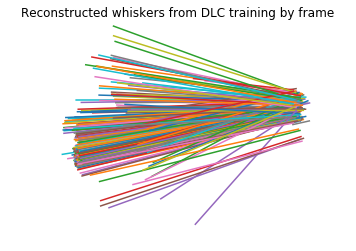

In [6]:
fig,ax=plt.subplots()
for ii in range(len(dlc1)):
    ar1 = [dlc1["base_x"][ii], dlc1["tip_x"][ii]]
    ar2 = [dlc1["base_y"][ii], dlc1["tip_y"][ii]]
    ax.plot(ar1,ar2)
ax.set_xlim(100,400)
ax.set_ylim(0,250)
ax.set_title("Reconstructed whiskers from DLC training by frame")
ax.tick_params(bottom = False, top = False, left = False, right = False)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.savefig('Reconstructed_Whisker')

In [16]:
dlc1["angle"] = np.round(np.degrees(np.arctan2(dlc1["tip_y"]-dlc1["base_y"],dlc1["tip_x"]-dlc1["base_x"]))+180)

In [38]:
dlc1_filt = dlc1[dlc1["angle"]<180].reset_index().drop(["index"], axis=1)

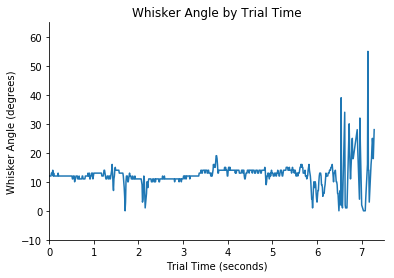

In [39]:
fig,ax = plt.subplots()
ax.plot(dlc1_filt["coords"]/100,dlc1_filt["angle"])
ax.set_xlabel("Trial Time (seconds)")
ax.set_ylabel("Whisker Angle (degrees)")
ax.set_title("Whisker Angle by Trial Time")
ax.set_xlim(0,7.5)
ax.set_ylim(-10,65)
ax.tick_params(top = False, right = False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig("Whisker angle trial time")